In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
df = pd.read_excel("files/WA_Fn-UseC_-Telco-Customer-Churn.xlsx")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 1. Data Cleaning and Preprocessing:

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Handle Nomeric Missing Values using fillna

In [6]:
df['TotalCharges'].fillna(df.TotalCharges.mean(),inplace=True)

C:\Users\aslam\AppData\Local\Temp\ipykernel_18116\3555833622.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df.TotalCharges.mean(),inplace=True)


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Convert categorical data into a numerical format using one-hot encoding

In [8]:
# Save DataFrame to CSV using Dashboard
df.to_csv("dashboarddataset.csv", index=False)  # index=False to avoid saving row numbers

In [9]:
one_en_data = df[["gender","Partner", "Dependents","PhoneService","PaperlessBilling","Churn"]]

In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
ohe = OneHotEncoder(drop="first")
ar = ohe.fit_transform(one_en_data).toarray()

In [12]:
pd.DataFrame(ar, columns=["gender_Male","Partner_Yes","Dependents_Yes","PhoneService_Yes","PaperlessBilling_Yes","Churn_Yes"])

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,Churn_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,1.0,0.0
7039,0.0,1.0,1.0,1.0,1.0,0.0
7040,0.0,1.0,1.0,0.0,1.0,0.0
7041,1.0,1.0,0.0,1.0,1.0,1.0


### Convert categorical data into a numerical format using label encoding.

In [13]:
lb_en_data = df[["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]]

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
# la = LabelEncoder()
# ar=la.fit_transform(lb_en_data)

In [16]:
le = LabelEncoder()

In [17]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [18]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


#### Standardize numerical columns (MonthlyCharges, TotalCharges).

#### Apply Standardize Feature Scaling on MonthlyCharges

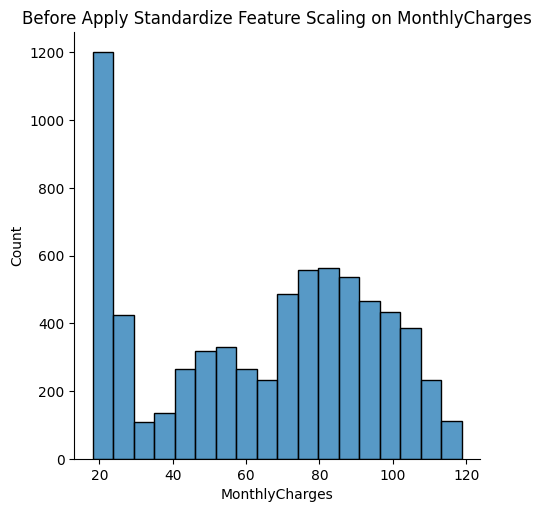

In [20]:
sns.displot(df["MonthlyCharges"])
plt.title("Before Apply Standardize Feature Scaling on MonthlyCharges")
plt.show()

In [21]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()
ss.fit(df[["MonthlyCharges"]])

StandardScaler()

In [24]:
df["MonthlyCharges"] = pd.DataFrame(ss.transform(df[["MonthlyCharges"]]))

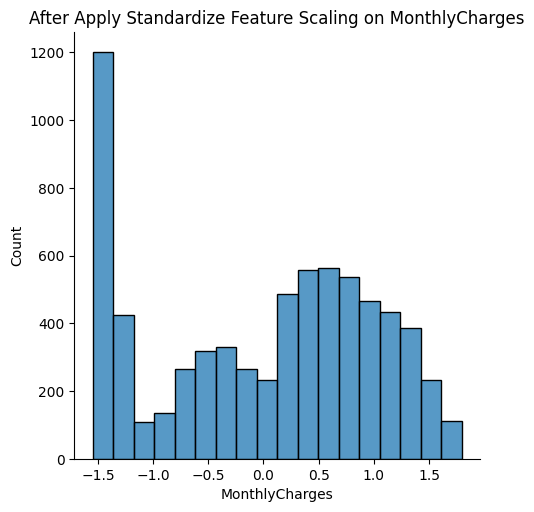

In [25]:
sns.displot(df["MonthlyCharges"])
plt.title("After Apply Standardize Feature Scaling on MonthlyCharges")
plt.show()

#### Apply Standardize Feature Scaling on TotalCharges

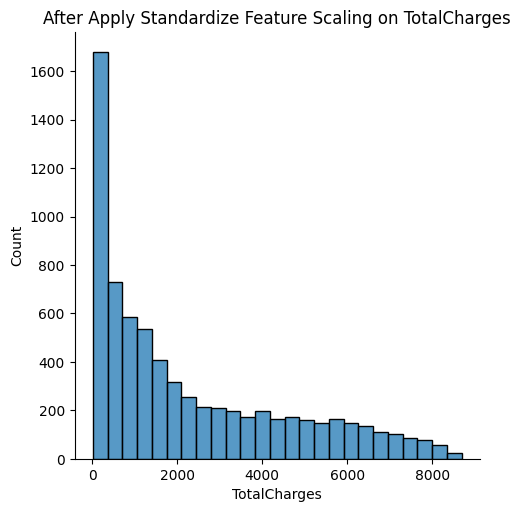

In [26]:
sns.displot(df["TotalCharges"])
plt.title("After Apply Standardize Feature Scaling on TotalCharges")
plt.show()

In [27]:
ss.fit(df[["TotalCharges"]])
df["TotalCharges"] = pd.DataFrame(ss.transform(df[["TotalCharges"]]))

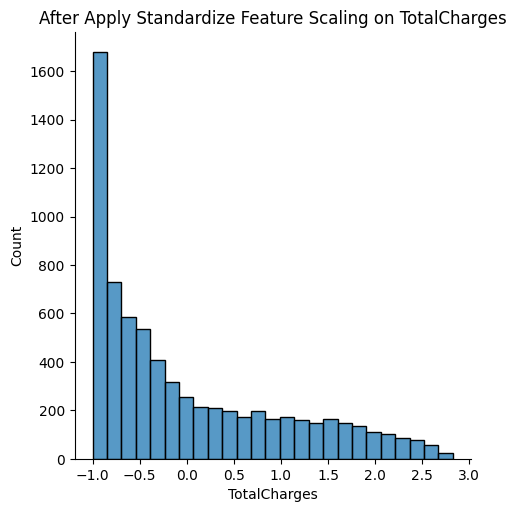

In [28]:
sns.displot(df["TotalCharges"])
plt.title("After Apply Standardize Feature Scaling on TotalCharges")
plt.show()

## 2. Exploratory Data Analysis (EDA):

### Analyze churn rates by various features such as contract type, internet service type, and monthly charges

### Visualize data using charts (bar plots, histograms, box plots, etc.).

#### Analyze churn rates by Contract 

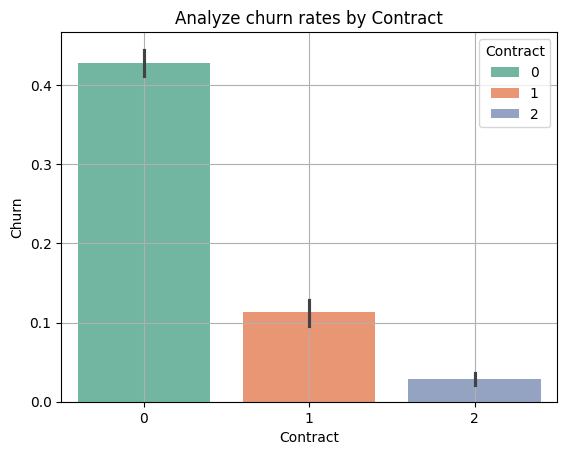

In [29]:
sns.barplot(x="Contract", y="Churn", data=df, hue="Contract", palette='Set2')
plt.title("Analyze churn rates by Contract")
plt.xlabel("Contract")
plt.ylabel("Churn")
plt.grid(True)
plt.show()

#### Analyze churn rates by InternetService 

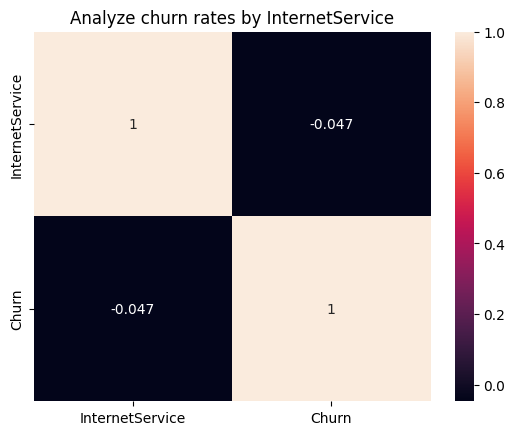

In [30]:
sns.heatmap(df[['InternetService', 'Churn']].corr(), annot = True)
plt.title("Analyze churn rates by InternetService")
plt.show()

#### Analyze churn rates by MonthlyCharges 

C:\Users\aslam\AppData\Local\Temp\ipykernel_18116\4278764887.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette='Set1')


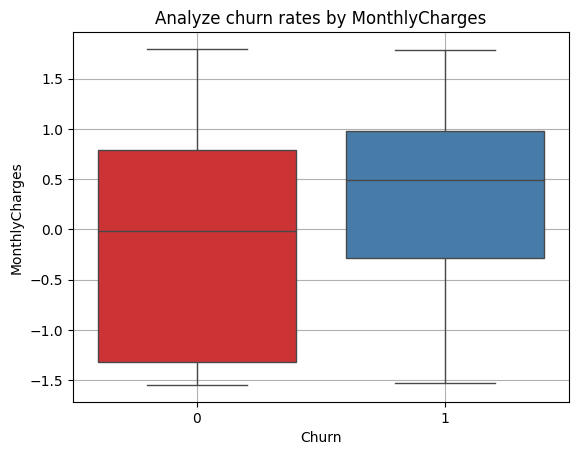

In [31]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette='Set1')
plt.title("Analyze churn rates by MonthlyCharges")
plt.xlabel("Churn")
plt.ylabel("MonthlyCharges")
plt.grid(True)
plt.show()

## 3. Feature Engineering:

### Create new features (e.g., AverageMonthlySpend by dividing TotalCharges by Tenure).

In [32]:
# Create new feature: AverageMonthlySpend
df['AverageMonthlySpend'] = df['TotalCharges'] / df['tenure']

In [33]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageMonthlySpend
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,2,-1.160323,-0.994971,0,-0.994971
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,0,1,0,3,-0.259629,-0.173876,0,-0.005114
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,1,3,-0.362660,-0.960399,1,-0.480200


In [34]:
df.isnull().sum()

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
AverageMonthlySpend    11
dtype: int64

In [35]:
# Handle potential division by zero errors
df['AverageMonthlySpend'] = df['AverageMonthlySpend'].replace([float('inf'), -float('inf')], 0).fillna(0)

In [36]:
df.isnull().sum()

customerID             0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure                 0
PhoneService           0
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
AverageMonthlySpend    0
dtype: int64

### Remove irrelevant or highly correlated features.

#### The customerID column is an identifier and does not contribute to analysis, so it should be removed.

In [37]:
# Drop irrelevant columns (e.g., CustomerID)
df = df.drop(columns=['customerID'])

In [38]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,AverageMonthlySpend
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,-1.160323,-0.994971,0,-0.994971
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,-0.259629,-0.173876,0,-0.005114
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,-0.362660,-0.960399,1,-0.480200


## 4. Model Building:

### Split the dataset into training and testing sets.

In [39]:
# Divide variables into a dependent and independent variable
x = df.drop(columns=["Churn"])  # Independent variables
y = df["Churn"] # Dependent variable

In [40]:
x.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,AverageMonthlySpend
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971,-0.994971
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876,-0.005114
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399,-0.480200


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Dividing a variables into a training and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Use machine learning models such as:

#### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()

In [45]:
# fit the model in LogisticRegression model
lr.fit(x_train, y_train)

C:\Users\aslam\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rfc = RandomForestClassifier(n_estimators=50, random_state=42)

In [48]:
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

#### Gradient Boosting (e.g., XGBoost, LightGBM)

##### Gradient Boosting use XGBoost

In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier()

In [51]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

###  Train and tune the model using cross-validation.

In [52]:
new_data = df.head(10)

In [53]:
x_new = new_data.drop(columns=["Churn"]) 
y_new = new_data["Churn"] 

In [54]:
from sklearn.model_selection import LeaveOneOut, LeavePOut, KFold

In [55]:
# LeaveOneOut
lo = LeaveOneOut()
for train, test in lo.split(x_new,y_new):
    print(train, test)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


In [56]:
# LeavePOut
lp = LeavePOut(p=2)
for train, test in lp.split(x_new,y_new):
    print(train, test)

[2 3 4 5 6 7 8 9] [0 1]
[1 3 4 5 6 7 8 9] [0 2]
[1 2 4 5 6 7 8 9] [0 3]
[1 2 3 5 6 7 8 9] [0 4]
[1 2 3 4 6 7 8 9] [0 5]
[1 2 3 4 5 7 8 9] [0 6]
[1 2 3 4 5 6 8 9] [0 7]
[1 2 3 4 5 6 7 9] [0 8]
[1 2 3 4 5 6 7 8] [0 9]
[0 3 4 5 6 7 8 9] [1 2]
[0 2 4 5 6 7 8 9] [1 3]
[0 2 3 5 6 7 8 9] [1 4]
[0 2 3 4 6 7 8 9] [1 5]
[0 2 3 4 5 7 8 9] [1 6]
[0 2 3 4 5 6 8 9] [1 7]
[0 2 3 4 5 6 7 9] [1 8]
[0 2 3 4 5 6 7 8] [1 9]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 3 5 6 7 8 9] [2 4]
[0 1 3 4 6 7 8 9] [2 5]
[0 1 3 4 5 7 8 9] [2 6]
[0 1 3 4 5 6 8 9] [2 7]
[0 1 3 4 5 6 7 9] [2 8]
[0 1 3 4 5 6 7 8] [2 9]
[0 1 2 5 6 7 8 9] [3 4]
[0 1 2 4 6 7 8 9] [3 5]
[0 1 2 4 5 7 8 9] [3 6]
[0 1 2 4 5 6 8 9] [3 7]
[0 1 2 4 5 6 7 9] [3 8]
[0 1 2 4 5 6 7 8] [3 9]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 5 7 8 9] [4 6]
[0 1 2 3 5 6 8 9] [4 7]
[0 1 2 3 5 6 7 9] [4 8]
[0 1 2 3 5 6 7 8] [4 9]
[0 1 2 3 4 7 8 9] [5 6]
[0 1 2 3 4 6 8 9] [5 7]
[0 1 2 3 4 6 7 9] [5 8]
[0 1 2 3 4 6 7 8] [5 9]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 7 9] [6 8]
[0 1 2 3 4 5 7 8

In [57]:
# KFold
kf = KFold(n_splits=5)
for train, test in kf.split(x_new,y_new):
    print(train, test)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


## 5. Model Evaluation:

### Evaluate the model using metrics like:

In [58]:
# Use the model to predict on x.
y_pred = lr.predict(x)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [59]:
# impport the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [60]:
# Evaluate the Model
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
rou_auc = roc_auc_score(y, y_pred)

In [61]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.8082
Precision: 0.6731
Recall: 0.5388
F1-score: 0.5985


In [62]:
# Save DataFrame to CSV
df.to_csv("dataset.csv", index=False)  # index=False to avoid saving row numbers